In [9]:
import pandas as pd
import numpy as np

cab = pd.read_csv('/Users/elenayun/Desktop/DG/Cab_Data.csv')

city = pd.read_csv('/Users/elenayun/Desktop/DG/City.csv')

customer = pd.read_csv('/Users/elenayun/Desktop/DG/Customer_ID.csv')

transaction_id = pd.read_csv('/Users/elenayun/Desktop/DG/Transaction_ID.csv')

In [6]:
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [7]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [8]:
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [11]:
transaction_id

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


## Which cab company has the highest number of transactions overall?

In [31]:
cab['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

## What is the distribution of transactions between the two cab companies?

In [32]:
yellow= cab[cab['Company']=='Pink Cab']
pink = cab[cab['Company']=='Yellow Cab']

<AxesSubplot:ylabel='Density'>

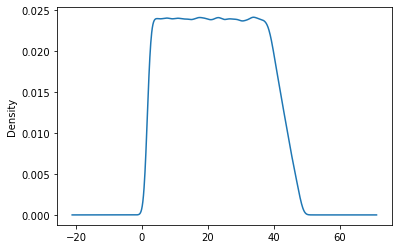

In [69]:
cab['KM Travelled'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

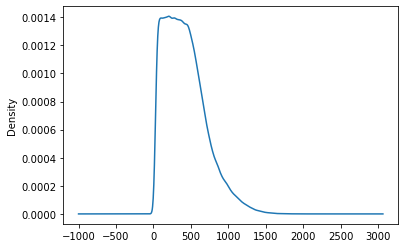

In [79]:
cab['Price Charged'].plot(kind='kde')

## What is the average fare for each cab company?

In [88]:
mean_fare = cab.groupby(['Company'])['Price Charged'].mean()
mean_fare

Company
Pink Cab      310.800856
Yellow Cab    458.181990
Name: Price Charged, dtype: float64

## Is there a correlation between the fare amount and the distance traveled?

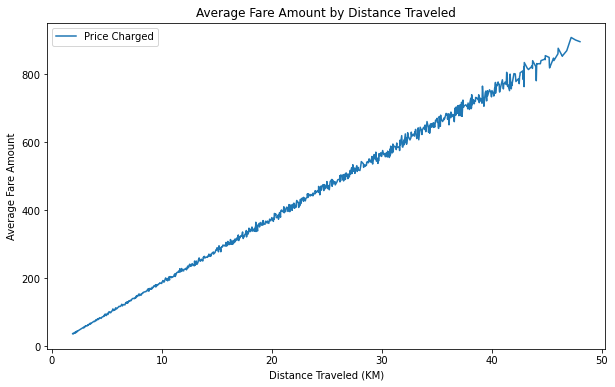

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

avg_fees= cab.groupby(['KM Travelled'])['Price Charged'].mean()


df_avg_fees = pd.DataFrame(avg_fees)
df_avg_fees.reset_index(inplace=True)

df_avg_fees.plot(x='KM Travelled', y='Price Charged', kind='line', figsize=(10, 6))
plt.xlabel('Distance Traveled (KM)')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Distance Traveled')
plt.show()


## What are the popular payment modes for cab transactions?

In [26]:
cab_modes = pd.merge(cab,transaction_id,on='Transaction ID')

In [27]:
cab_modes

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [28]:
cab_modes['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

## If there any patterns or trends in the customer demographics based on the Customer_ID mapping table?

In [30]:
customer['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [38]:
transaction_customer=pd.merge(customer,transaction_id,on='Customer ID')

In [49]:
transaction_customer_cab= pd.merge(transaction_customer,cab,on='Transaction ID')
transaction_customer_cab

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144
359388,12490,Male,33,18713,10439799,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720
359389,41414,Male,38,3960,10439838,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600
359390,41677,Male,23,19454,10439840,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600


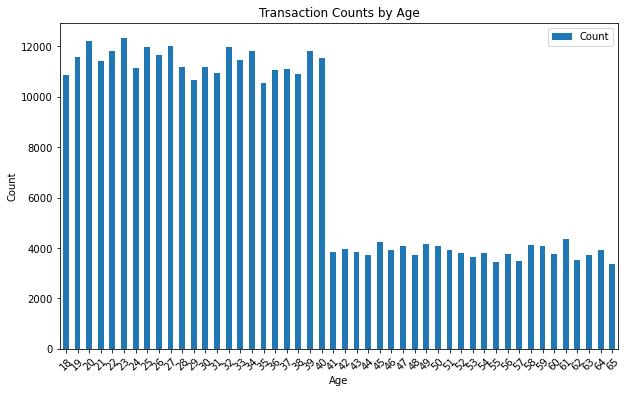

In [64]:
age= transaction_customer_cab['Age'].value_counts()

df_age_counts = pd.DataFrame(age)
df_age_counts.columns = ['Count']

df_age_counts = df_age_counts.sort_index()

df_age_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Transaction Counts by Age')
plt.xticks(rotation=45)
plt.show()

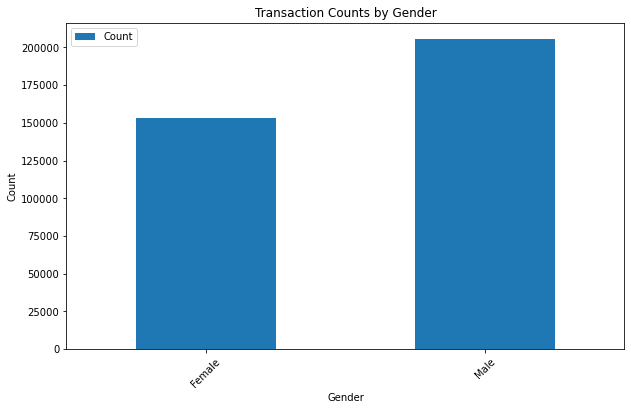

In [66]:
gender=transaction_customer_cab['Gender'].value_counts()
df_gender_counts = pd.DataFrame(gender)
df_gender_counts.columns = ['Count']

df_gender_counts = df_gender_counts.sort_index()

df_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Transaction Counts by Gender')
plt.xticks(rotation=45)
plt.show()

In [61]:
income=transaction_customer_cab['Income (USD/Month)'].value_counts()
df_income_counts = pd.DataFrame(income)
df_income_counts.columns = ['Count']

df_income_counts = df_income_counts.sort_index()

In [62]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, float('inf')]
labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000', '35000+']
df_income_counts['Income Group'] = pd.cut(df_income_counts.index, bins=bins, labels=labels, right=False)

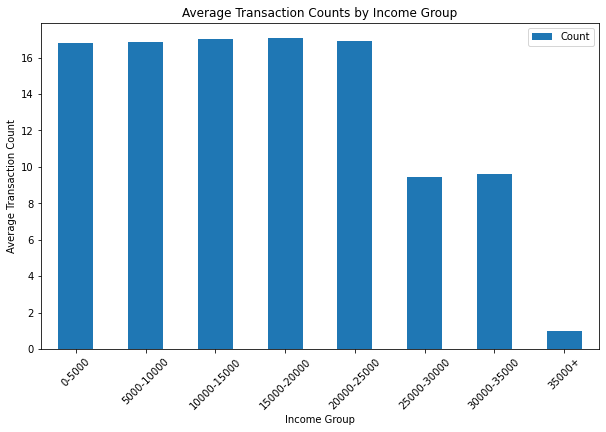

In [63]:
df_avg_income_counts = df_income_counts.groupby('Income Group')['Count'].mean().reset_index()
df_avg_income_counts.plot(x='Income Group', y='Count', kind='bar', figsize=(10, 6))
plt.xlabel('Income Group')
plt.ylabel('Average Transaction Count')
plt.title('Average Transaction Counts by Income Group')
plt.xticks(rotation=45)
plt.show()

## How does the customer profile differ between the two cab companies?

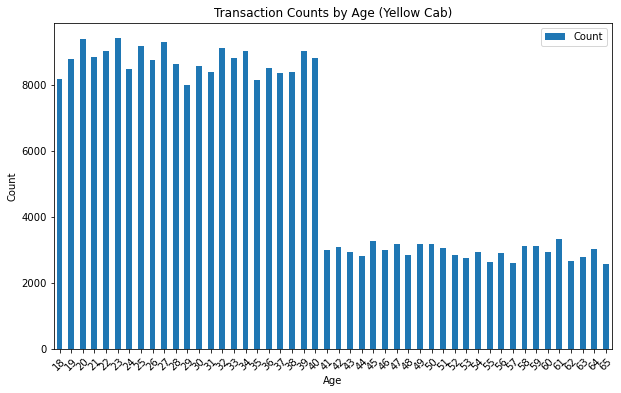

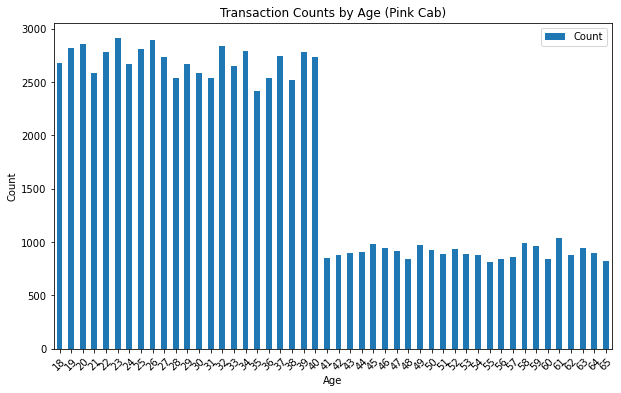

In [67]:
yellow=transaction_customer_cab[transaction_customer_cab['Company']=='Yellow Cab']
age= yellow['Age'].value_counts()

df_age_counts = pd.DataFrame(age)
df_age_counts.columns = ['Count']

df_age_counts = df_age_counts.sort_index()

df_age_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Transaction Counts by Age (Yellow Cab)')
plt.xticks(rotation=45)
plt.show()

pink=transaction_customer_cab[transaction_customer_cab['Company']=='Pink Cab']
age= pink['Age'].value_counts()

df_age_counts = pd.DataFrame(age)
df_age_counts.columns = ['Count']

df_age_counts = df_age_counts.sort_index()

df_age_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Transaction Counts by Age (Pink Cab)')
plt.xticks(rotation=45)
plt.show()

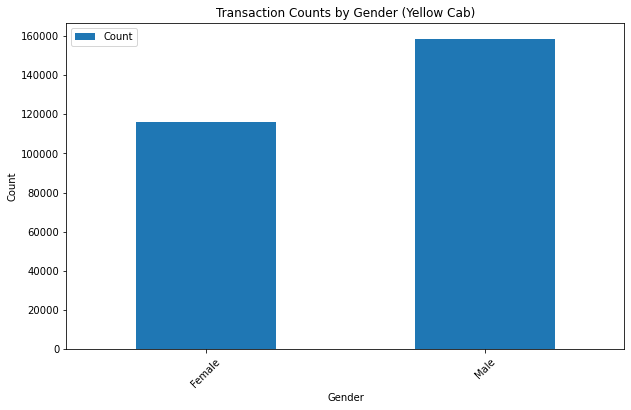

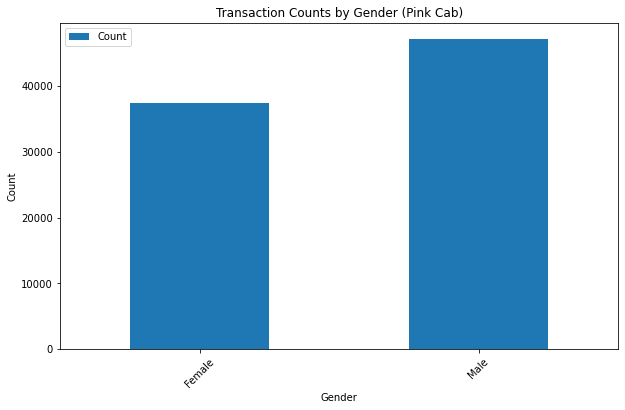

In [68]:
gender=yellow['Gender'].value_counts()
df_gender_counts = pd.DataFrame(gender)
df_gender_counts.columns = ['Count']

df_gender_counts = df_gender_counts.sort_index()

df_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Transaction Counts by Gender (Yellow Cab)')
plt.xticks(rotation=45)
plt.show()

gender=pink['Gender'].value_counts()
df_gender_counts = pd.DataFrame(gender)
df_gender_counts.columns = ['Count']

df_gender_counts = df_gender_counts.sort_index()

df_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Transaction Counts by Gender (Pink Cab)')
plt.xticks(rotation=45)
plt.show()

## Is there a correlation between the population of a city and the number of cab users? Which cities have the highest number of cab users?

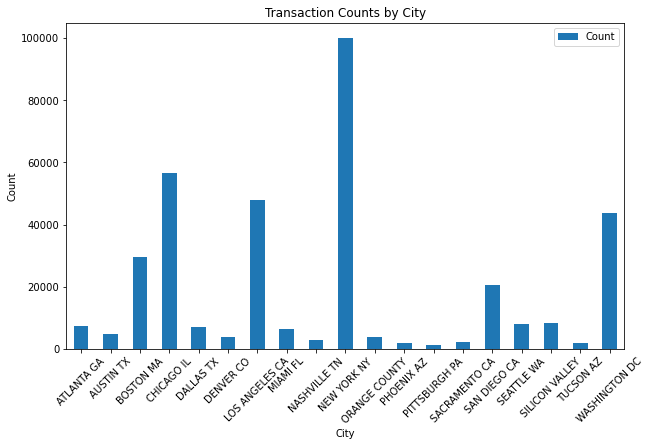

In [85]:
city_counts = transaction_customer_cab['City'].value_counts()

df_city_counts = pd.DataFrame(city_counts)
df_city_counts.columns = ['Count']

df_city_counts = df_city_counts.sort_index()

df_city_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Transaction Counts by City')
plt.xticks(rotation=45)
plt.show()

## Are there any specific cities where one cab company dominates the market?

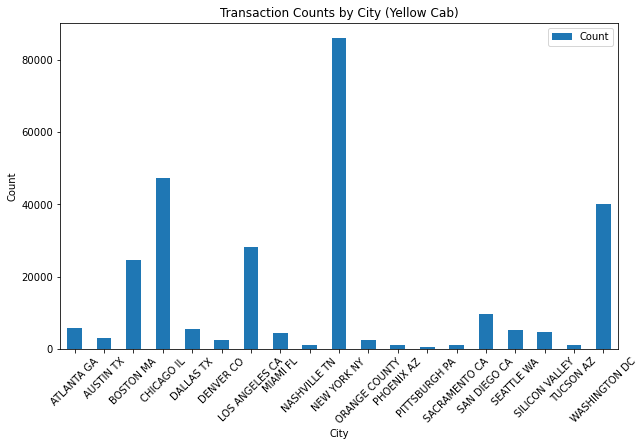

In [86]:
city_counts_yellow = yellow['City'].value_counts()

df_city_counts = pd.DataFrame(city_counts_yellow)
df_city_counts.columns = ['Count']

df_city_counts = df_city_counts.sort_index()

df_city_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Transaction Counts by City (Yellow Cab)')
plt.xticks(rotation=45)
plt.show()

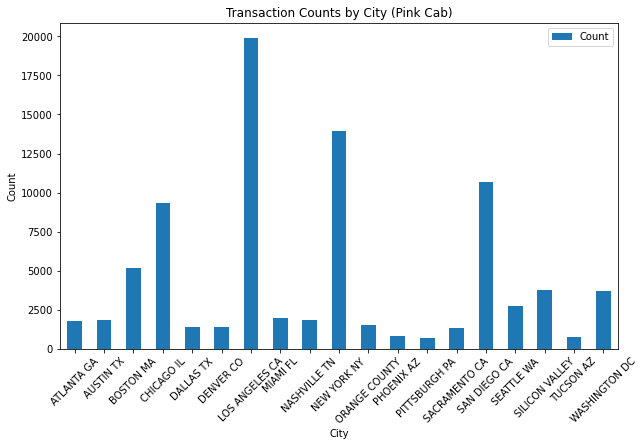

In [87]:
city_counts_pink=pink['City'].value_counts()

df_city_counts = pd.DataFrame(city_counts_pink)
df_city_counts.columns = ['Count']

df_city_counts = df_city_counts.sort_index()

df_city_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Transaction Counts by City (Pink Cab)')
plt.xticks(rotation=45)
plt.show()

## Insights

- Market Share: Yellow Cab has the highest number of transactions overall, indicating that it may have a larger market share compared to Pink Cab, which can be useful for investors looking to invest in the dominant cab company in terms of transaction volume.
- Fare Comparison: The average fare for Yellow Cab is higher than that of Pink Cab, which suggests that Yellow Cab might be targeting a higher-end or premium market segment. Investors can consider this information when assessing the potential profitability and target customer base of each cab company.
- Payment Modes: The finding that card is the popular payment mode for cab transactions highlights the importance of ensuring that both cab companies have convenient and reliable card payment systems, which can guide investment decisions related to upgrading payment infrastructure or implementing digital payment solutions.
- Customer Demographics: The patterns observed in customer demographics based on gender, age, and income can help in understanding the target audience and tailoring marketing strategies. For example, since males have higher transaction counts, marketing efforts can focus on targeting male customers. Similarly, age and income insights can be utilized to create personalized offers and promotions to attract and retain customers within specific age and income groups.
- City-specific Strategies: Nashville TN and Los Angeles (LA) are cities where one cab company dominates the market. This information can guide investment decisions by considering the market conditions and competition in each city. For instance, in Nashville TN, focusing on expanding the services and coverage of Yellow Cab could be a strategic move to further consolidate its dominance.